## AIRBNB ANALYSIS PROJECT ##
#### by Samantha Erskine

### 
This dataset consists of airbnb hostings in New York City in 2019, it consists of the host name, neighbourhood, latitude, longitue, room type, price, minimum nights, number of reviews, last review, reviews per month, calculated host listings and availability.
### 
This analysis aims to highlight which neighbourhoods are most popular for airbnb, to assess the price levels for listings, as well as check for the priciest neighbourhoods in NYC on Airbnb.



### Airbnb Dataset variables
1. hostname - The name of properties on Airbnb.
2. neighbourhood - The neighbourhoods of various Airbnb properties.
3. neighbourhoodgroup - Grouping neighbourhoods of Airbnb into their major areas.
4.  latitude - Geographical Positioning of the properties.
5.  longitude - Geographical Positioning of the properties.
6.  roomtype - Specifications on types of property on Airbnb.
7.  price - The price of the properties on airbnb.
8.  minimum_nights - The minimum number of nights a customer(s) can stay for.
9.  number_of_reviews - The number of reviews left on various listings.
10.  last_review - The last review indicates the dates the property was last reviewed by a customer(s)
11. reviews_per_month - The number of reviews in a month per listing
12. calculated_host_listings -The number of listings a host has had on their property.
13. name - names of Airbnb properties as stated on Airbnb app.
14. host_id - the unique identification number of hosts.
15. availability_365 - The number of days in a year that this property is available for on airbnb.
16. id - id for dataset

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pxx


In [2]:
#Loading in the dataset of Earthquake csv file

airbnb = pd.read_csv('/Users/samanthaerskine/Desktop/VS Code File/Airbnb_NYC_2019.csv')


In [3]:
#View of five rows of the dataset
airbnb.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Number of columns and rows in the dataset
airbnb.shape

(48895, 16)

In [5]:
#Further information on the dataset.
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Dataset is a mix of integer, float and object datatype, and name, host_name, last_review & reviews_per_month have null values.

In [6]:
# Checking for columns with null values
airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
#Dropping rows with null values
airbnb.dropna(axis=0,inplace=True)

In [8]:
#Confirming that null values have been dropped
airbnb.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [9]:
#Checking for duplicates in the system
airbnb.duplicated().sum()

0

## UNIVARIATE ANALYSIS

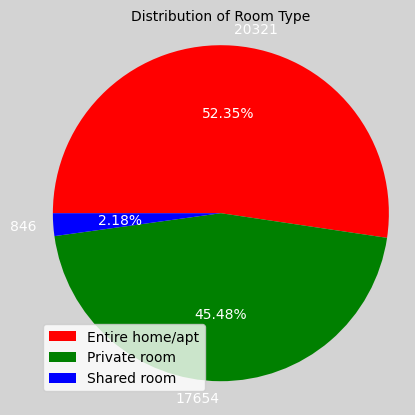

In [10]:
#Piechart of Room Type
fig = plt.figure()
fig.patch.set_facecolor('lightgrey')
 
airbnb_counts = airbnb['room_type'].value_counts()
colors=['red','green','blue']

#Plotting the pie chart
plt.title('Distribution of Room Type',size=10)
wedges, labels, autopct=plt.pie(airbnb_counts,labels = airbnb_counts.values, startangle = 180, counterclock = False,colors=colors,shadow=False, autopct='%1.2f%%', textprops={'color':"w"})
plt.axis('square')
plt.setp(autopct, fontsize=10)
plt.setp(labels, fontsize=10)
plt.legend(airbnb_counts.index, fontsize=10);


There are more entire homes/apartments, followed by private rooms, with shared rooms coming out the least.

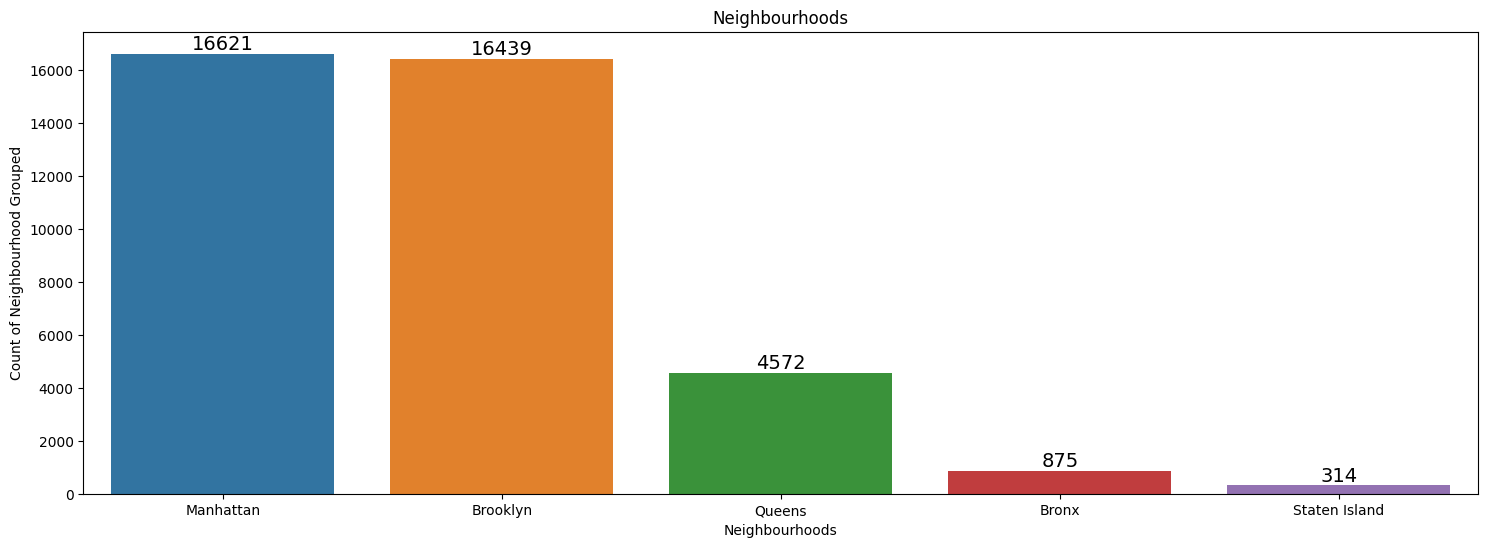

In [11]:
# Count of the number of neighbourhood groups with airbnb listings
plt.figure(figsize=[18,6])
airbnb_counts = airbnb['neighbourhood_group'].value_counts()
airbnb_order = airbnb_counts.index
airbnbs=sns.countplot(data = airbnb, x = 'neighbourhood_group',order=airbnb_order)
plt.bar_label(airbnbs.containers[0],size=14,fmt='%.0f')
plt.xlabel('Neighbourhoods')
plt.ylabel('Count of Neighbourhood Grouped')
plt.title('Neighbourhoods');


This count shows that the neighbourhood with the highest number of listings is Manhattan, followed by Brooklyn, Queens, Bronx and finally Staten Island.

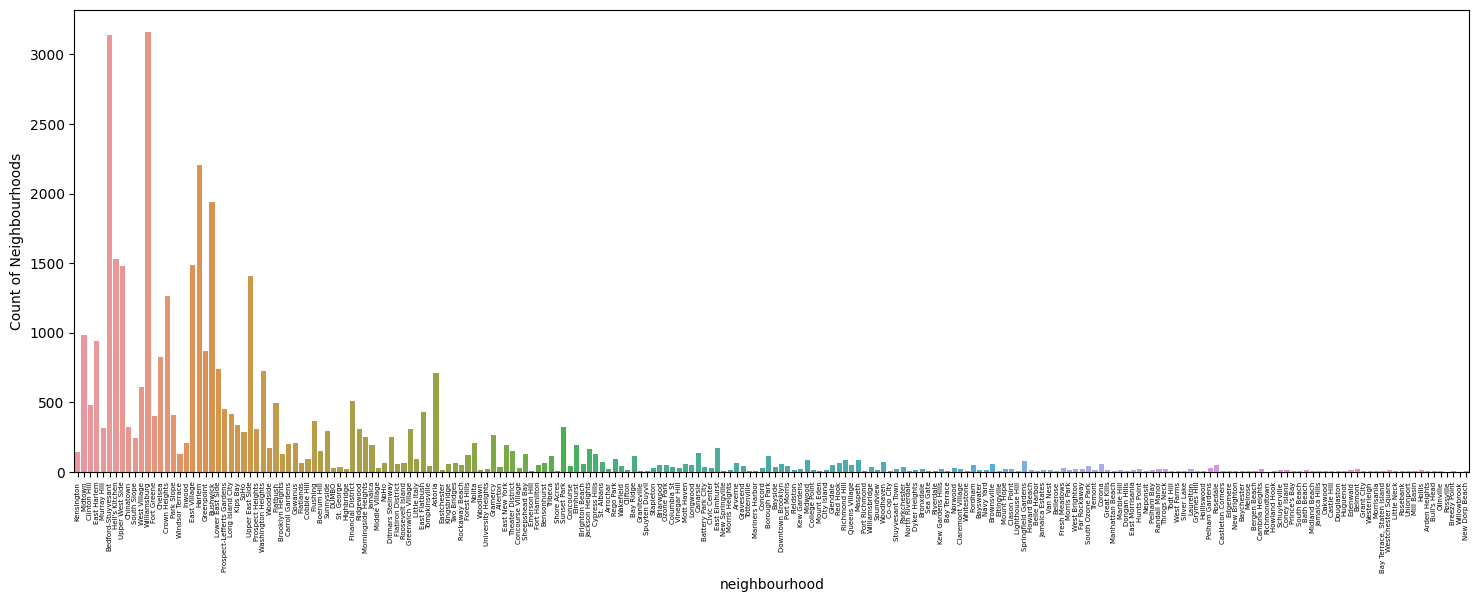

In [12]:
#Count of Neighbourhoods
plt.figure(figsize=[18,6])
sns.countplot(data = airbnb, x = 'neighbourhood')
plt.ylabel('Count of Neighbourhoods')
plt.xticks(rotation=90, fontsize=5);

The neighbourhood with the highest count of airbnb listing is Williamsburg, with Willowsbrook and Rossville being some of the lowest.

# BIVARIATE ANALYSIS

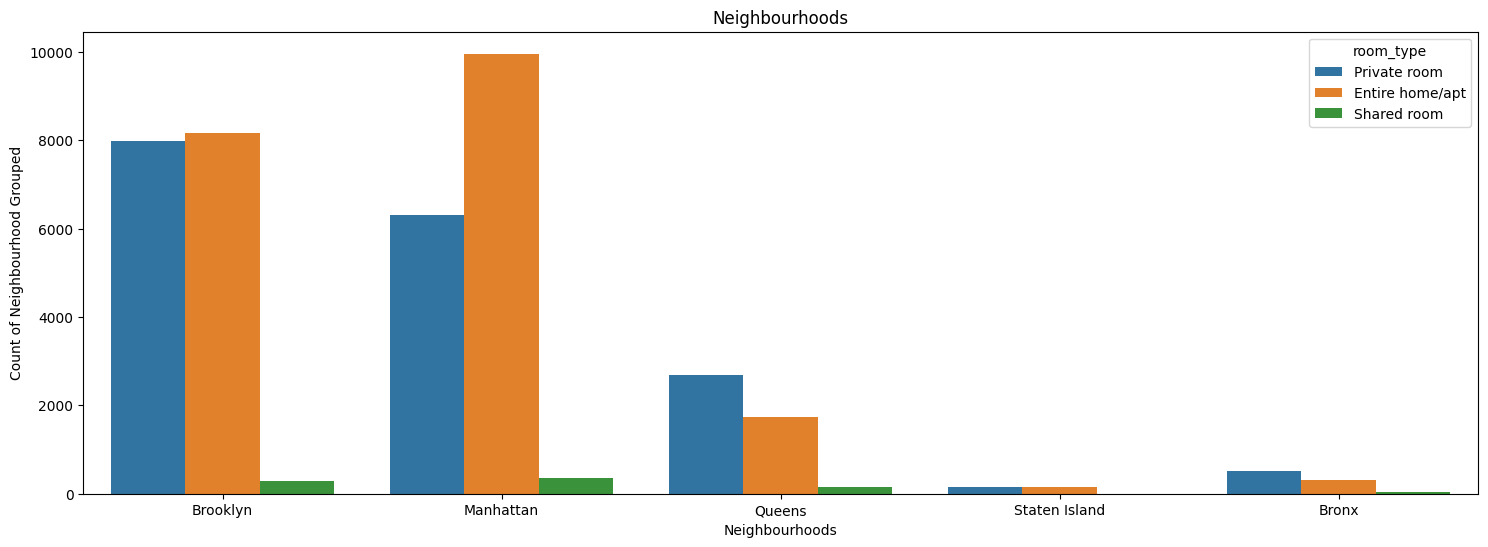

In [13]:
# Count of the number of neighbourhood groups with airbnb listings
plt.figure(figsize=[18,6])
airbnbs=sns.countplot(data = airbnb, x = 'neighbourhood_group',hue='room_type')
plt.xlabel('Neighbourhoods')
plt.ylabel('Count of Neighbourhood Grouped')
plt.title('Neighbourhoods');


The Brooklyn area has more entire home/apt listings at approximately 8000, than private rooms at 8000 with shared rooms at 250 listings. Manhattan has Entire home/ apartment listings being the most popular at 10,000, followed by private rooms at 6000 and then shared rooms, also at 250. Queens has about 3000 listing s from private rooms, that reign the most popular in that area. For Staten Island they have about 100 listings from Private rooms abd entire homes and apartments. In the Bronx, private rooms also prove more popular at about 500 listings, entire homes/ apartments cover about half that number with very few shared rooms.

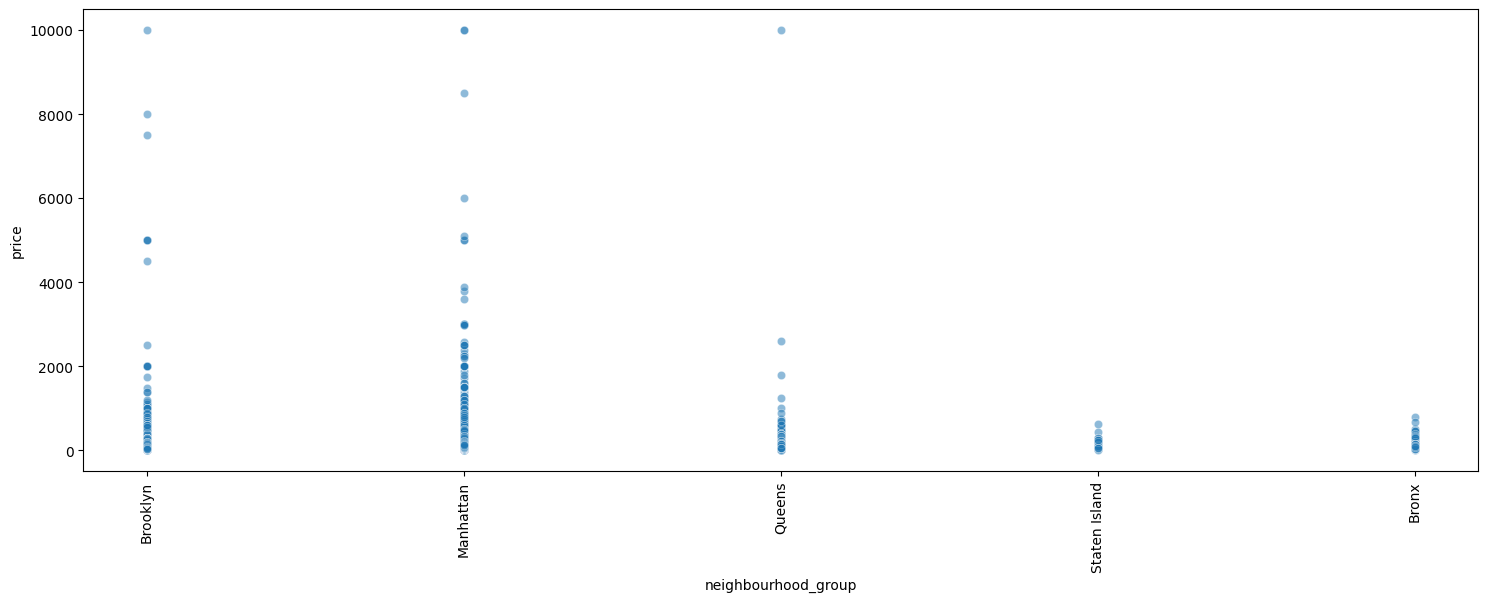

In [14]:
plt.figure(figsize = [18, 6])
sns.scatterplot(data = airbnb, x = 'neighbourhood_group', y = 'price',alpha=1/2)
plt.xticks(rotation=90);

Manhattan has the highest number of listings and is the area with listings with a higher price than the other neighbourhoods, this is followed by Brooklyn with most listing being between 0 and 2000 dollars and a few ranging above that, followed by Queens.

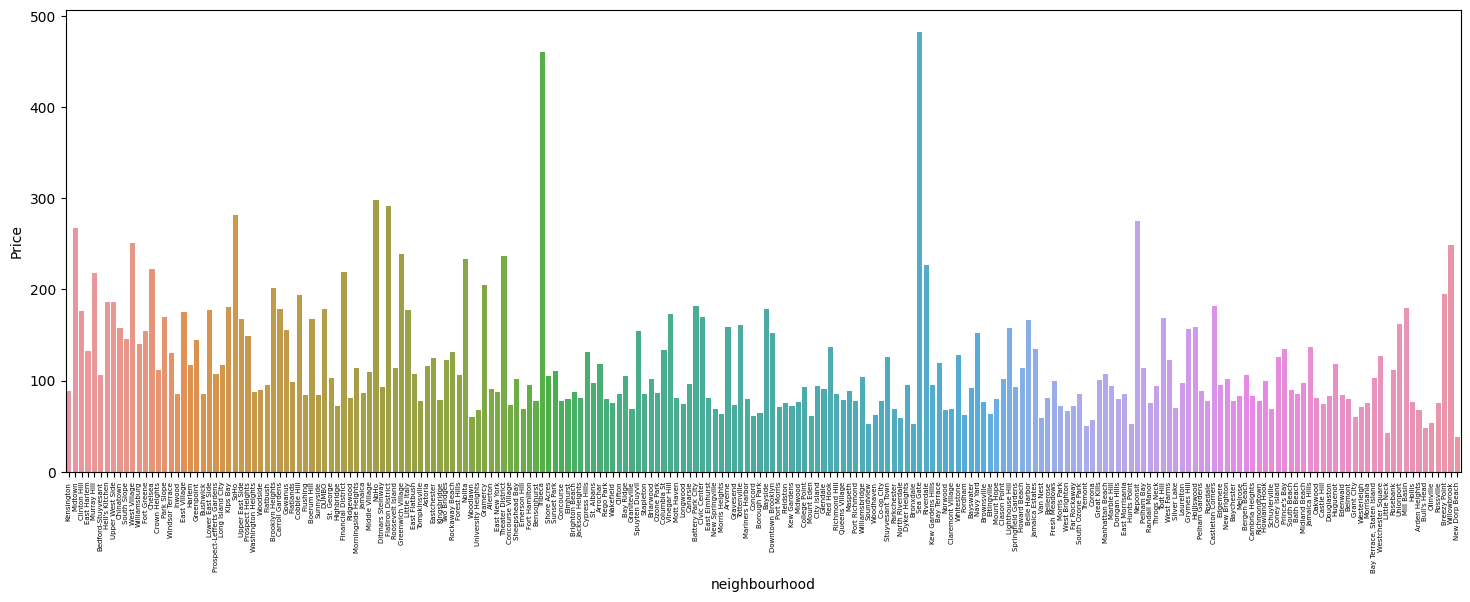

In [15]:
#Count of Neighbourhoods Against Price
plt.figure(figsize=[18,6])
sns.barplot(data = airbnb, x = 'neighbourhood',y='price',errorbar=None)
plt.ylabel('Price')
plt.xticks(rotation=90, fontsize=5);

This shows the analysis between price and neighbourhoods on Airbnb, with Sea Gate being one of the pricier neighbourhoods, and New Dorp Beach being in the lower priced category.

## MULTIVARIATE ANALYSIS

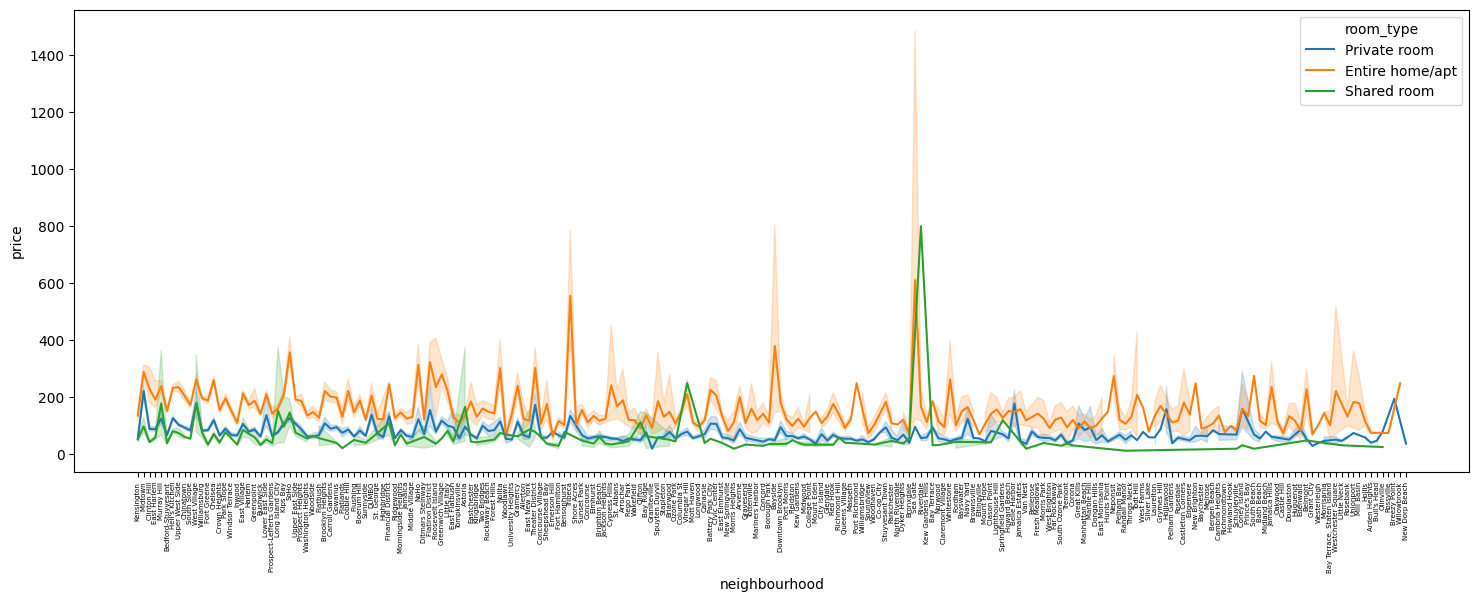

In [16]:
#Room Type Against Price and Neighbourhood
plt.figure(figsize = [18, 6])
sns.lineplot(data=airbnb,x='neighbourhood',y='price' ,hue='room_type')
plt.xticks(rotation=90,fontsize=5);


This is a deep dive into the prices in neighbourhoods seperated into room types, with shared rooms being on the lower end followed by private rooms and entire homes. This may be attributed to the count of these particular room types. However, toward the middle covering neighbourhoods such as Bronxdale, Sea Gate and Riverdale, there is a spike in price of shared rooms at 1400 dollars.

## Conclusion 

### . The features of my interest in this analysis were room type, price, neighbourhood and neighbourhood group. 

. In this analysis, we were able to see the variations in these unique features separately in the nivariate analysis. We found out that there are more entire homes/apartments, followed by private rooms, with shared rooms coming out the least. We also found out that, Manhattan is one of the top spots for airbnb in NYC, as the neighbourhood with the highest number of listings is Manhattan, followed by Brooklyn, Queens, Bronx and finally Staten Island. Also, the neighbourhood with the highest count of airbnb listing is Williamsburg, this shows the areas' popularity as an airbnb in NYC in 2019, with Willowsbrook and Rossville being some of the lowest.

. In terms of the features interactions with each other, we were able to find out that, the Brooklyn area has more entire home/apt listings at approximately 8000, than private rooms at 8000 with shared rooms at 250 listings. Manhattan has Entire home/ apartment listings being the most popular at 10,000, followed by private rooms at 6000 and then shared rooms, also at 250. Queens has about 3000 listings from private rooms, that reign the most popular in that area. For Staten Island they have about 100 listings from Private rooms abd entire homes and apartments. In the Bronx, private rooms also prove more popular at about 500 listings, entire homes/ apartments cover about half that number with very few shared rooms. We also found that Entire homes or apartments have a high price of approximately 250 dollars, while private rooms have 80 dollars, with shared rooms coming out at 70 dollars. Also, we found out that Manhattan has the highest number of listings and is the area with higher priced listings than the other neighbourhoods, this is followed by Brooklyn with most listings being between 0 and 2000 dollars and a few ranging above that, followed by Queens which had one order priced at approximatele 10,000 dollars. We also found out that after analysis between price and neighbourhoods on Airbnb, with Sea Gate being one of the pricier neighbourhoods, and New Dorp Beach being in the lower priced category on Airbnb.

. For the multivariate analysis taking into account the room type and neighbourhoods, Airbnb properties in Sea Gate  and Riverdale with the entire home/apt room type came out as the most expensive listings with prices coming up to slightly above 1400 dollars.
